<a href="https://colab.research.google.com/github/diogaumbueno/AutomatizaRelatorio/blob/main/AutomatizaRelatorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Links:

  **Planilha exemplo**: https://onedrive.live.com/edit.aspx?resid=24DC2EE1D8809C50!1477&ithint=file%2cxlsx&authkey=!AN6NfEjLyp3SRHY
 
 **Arquivo .pug**: https://onedrive.live.com/?authkey=%21AL02U4eBpbWriHo&
 cid=24DC2EE1D8809C50&id=24DC2EE1D8809C50%211476&parId=24DC2EE1D8809C50%211475&o=OneUp

In [ ]:
pip install pdf_reports -q

     |████████████████████████████████| 118 kB 9.0 MB/s 
     |████████████████████████████████| 304 kB 62.1 MB/s 
     |████████████████████████████████| 88 kB 7.3 MB/s 
     |████████████████████████████████| 2.0 MB 60.3 MB/s 
     |████████████████████████████████| 45 kB 4.0 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pdf_reports import pug_to_html, write_report

# A biblioteca datetime vai ser fundamental para criação do relatório da data, uma vez importada, a cada vez que o código for gerado, o relatório ficará com a data atual



In [ ]:
planilha = pd.read_excel("/content/Vendas_diogo.xlsx")

In [ ]:
planilha

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,1,2019-01-01,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,1,2019-01-01,Iguatemi Esplanada,Camiseta,2,180,360
2,1,2019-01-01,Iguatemi Esplanada,Sapato Xadrez,1,368,368
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71
...,...,...,...,...,...,...,...
100994,69996,2019-12-26,Center Shopping Uberlândia,Short Listrado,2,102,204
100995,69996,2019-12-26,Center Shopping Uberlândia,Mochila,4,270,1080
100996,69996,2019-12-26,Center Shopping Uberlândia,Pulseira Estampa,1,87,87
100997,69997,2019-12-26,Ribeirão Shopping,Camisa Listrado,1,108,108


In [ ]:
faturamento = planilha[['ID Loja', 'Valor Final']].groupby('ID Loja').sum()
faturamento = faturamento.sort_values(by='Valor Final', ascending=False)
display(faturamento)

,Valor Final
ID Loja,
Iguatemi Campinas,1762419
Shopping Vila Velha,1731167
Bourbon Shopping SP,1726110
Rio Mar Recife,1722766
Shopping SP Market,1721763
Palladium Shopping Curitiba,1721120
Norte Shopping,1711968
Ribeirão Shopping,1707122
Iguatemi Esplanada,1699681


In [ ]:
quantidade = planilha[['ID Loja', 'Quantidade']].groupby('ID Loja').sum()
quantidade = quantidade.sort_values(by='ID Loja', ascending=False)
display(quantidade)

,Quantidade
ID Loja,
Shopping Vila Velha,9224
Shopping União de Osasco,8730
Shopping SP Market,8927
Shopping Recife,8581
Shopping Morumbi,8508
Shopping Midway Mall,8206
Shopping Iguatemi Fortaleza,8629
Shopping Ibirapuera,8723
Shopping Eldorado,8719


In [ ]:
hoje = datetime.now().date()
# a variavél hoje vai ser importante para a atualização do relatório

In [ ]:
html = pug_to_html('/content/modelo_vendas.pug',planilha=planilha,hoje=hoje, faturamento=faturamento)
# localizar o caminho do modelo de relatório e informar todos as váriavéis que são expostas no relatório final, em PDF

In [ ]:
html

'<style lang="scss">table{ page-break-after: always; }\nheader { font-size: 50px; font-family: ariel; color: #00FA9A; }\np { font-weight: bold }\n@page {\n  margin: 1cm 0 2cm 0cm;\n  @bottom-center {\n    content: "";\n  }\n}\n</style><img style="width:150px; display:block; margin:0 auto;" src="endereço completo da imagem da logo"/>\n<div id="sidebar">\n  <p>Atualizado por Diogo Bueno - 2022-07-22</p>\n</div>\n<h1>Relatório descritivo de Vendas</h1>\n<div class="ui piled segment">\n  <p>Este relatório contempla informações relativas às vendas anuais das lojas. Esse relatório foi desenvolvido para monitorar  as vendas das unidades pertencentes à rede de lojas e\ndetalhar as vendas de cada unidade\n  </p>\n</div>\n<p><strong><em>Gerado automaticamente e conferido pelo analista Diogo Bueno.</em></strong></p>\n<p><code>Controle de Vendas 2022-07-22.pdf</code></p>\n<div class="ui container">\n  <div class="ui icon message yellow block-center"><i class="exclamation circle icon"></i>\n    <di

In [ ]:
write_report(html, 'vendas.pdf')
# aqui vamos criar o pdf, nomeando ele. Lembre-se de alterar o dados no .pug de acordo com sua necessidade.
# imoprtante: após rodar esse comando, atualizar na pasta de arquivos(veja foto)

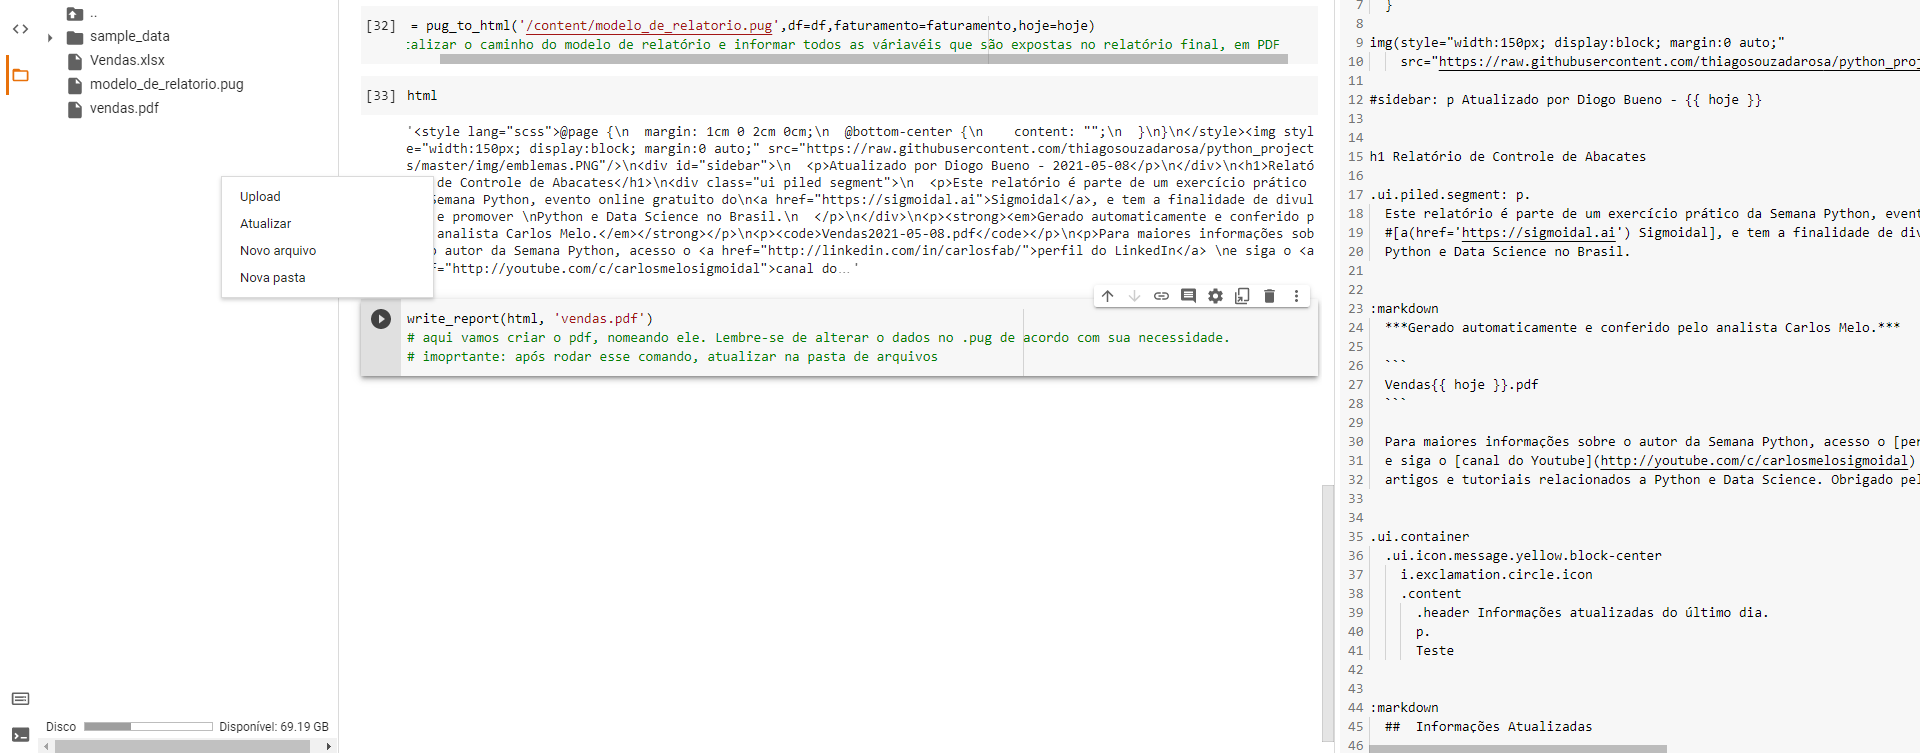

In [ ]:
faturamento.iloc[0:5].reset_index()


,ID Loja,Valor Final
0,Iguatemi Campinas,1762419
1,Shopping Vila Velha,1731167
2,Bourbon Shopping SP,1726110
3,Rio Mar Recife,1722766
4,Shopping SP Market,1721763


In [ ]:
quantidade.iloc[:25].reset_index()


,ID Loja,Quantidade
0,Shopping Vila Velha,9224
1,Shopping União de Osasco,8730
2,Shopping SP Market,8927
3,Shopping Recife,8581
4,Shopping Morumbi,8508
5,Shopping Midway Mall,8206
6,Shopping Iguatemi Fortaleza,8629
7,Shopping Ibirapuera,8723
8,Shopping Eldorado,8719
9,Shopping Center Leste Aricanduva,8938


In [ ]:
ticket_medio = (faturamento['Valor Final'] / quantidade['Quantidade']).to_frame()
ticket_medio = ticket_medio.rename(columns={0: 'Ticket Medio'})
display(ticket_medio)

,Ticket Medio
ID Loja,
Bourbon Shopping SP,194.754598
Center Shopping Uberlândia,193.453228
Iguatemi Campinas,197.248909
Iguatemi Esplanada,198.098019
Norte Shopping,189.923231
Novo Shopping Ribeirão Preto,191.775226
Palladium Shopping Curitiba,189.321307
Parque Dom Pedro Shopping,194.519552
Passei das Águas Shopping,191.345324


In [ ]:
faturamento = faturamento
display(faturamento)

,Valor Final
ID Loja,
Iguatemi Campinas,1762419
Shopping Vila Velha,1731167
Bourbon Shopping SP,1726110
Rio Mar Recife,1722766
Shopping SP Market,1721763
Palladium Shopping Curitiba,1721120
Norte Shopping,1711968
Ribeirão Shopping,1707122
Iguatemi Esplanada,1699681


In [ ]:
tabela_resumo = faturamento.join(quantidade).join(ticket_medio)
tabela_resumo = tabela_resumo.rename(columns={'Valor Final': 'Faturamento Total'})
display(tabela_resumo)



,Faturamento Total,Quantidade,Ticket Medio
ID Loja,,,
Iguatemi Campinas,1762419,8935,197.248909
Shopping Vila Velha,1731167,9224,187.680724
Bourbon Shopping SP,1726110,8863,194.754598
Rio Mar Recife,1722766,8863,194.377299
Shopping SP Market,1721763,8927,192.871401
Palladium Shopping Curitiba,1721120,9091,189.321307
Norte Shopping,1711968,9014,189.923231
Ribeirão Shopping,1707122,8825,193.441586
Iguatemi Esplanada,1699681,8580,198.098019


In [ ]:
#http://www.df.gov.br/wp-conteudo/themes/templategdf/img/marca-do-governo/Marca Horizontal.png